In [1]:
library(cluster)
library(caret)
library(dplyr)
library(clValid)
options(warn=-1)
library(dplyr)
library(DataExplorer)
library(ggplot2)
library(tidyr)
library(patchwork)
library(cowplot)
library(scales)
library(tidyverse)
library(reshape2)
library(kableExtra)
library(vcd)
library(performanceEstimation)
library(class)
library(ipred)
library(caret)
library(mlbench)
library(ROCR)
library(pROC)
library(MASS)
library(countrycode)
library(randomForest);

Ładowanie wymaganego pakietu: ggplot2

Ładowanie wymaganego pakietu: lattice


Dołączanie pakietu: ‘dplyr’


Następujące obiekty zostały zakryte z ‘package:stats’:

    filter, lag


Następujące obiekty zostały zakryte z ‘package:base’:

    intersect, setdiff, setequal, union



Dołączanie pakietu: ‘cowplot’


Następujący obiekt został zakryty z ‘package:patchwork’:

    align_plots


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::lift()       masks caret::lift()
✖ lubridate::stamp()  masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) 

In [2]:
test <- read.csv('data/test_data.csv', stringsAsFactors = TRUE)
train <- read.csv('data/train_data.csv', stringsAsFactors = TRUE)

In [3]:
data <- rbind(train, test)

In [4]:
x <- subset(data, select = -c(income_binary))

In [5]:
y <- subset(data, select = c(income_binary))

In [6]:
numerical_columns <- names(data[sapply(data, is.numeric)])
factor_columns <- names(data[sapply(data, is.factor)])

In [7]:
one_hot_encoded_data <- model.matrix(~ . -1, data = data)

In [8]:
x_encoded <- subset(one_hot_encoded_data, select = -c(income_binary))

In [9]:
scaled_data <- scale(x_encoded)

In [10]:
pca_result <- prcomp(scaled_data, center = TRUE, scale. = TRUE)

In [11]:
summary(pca_result)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.82124 1.55938 1.49687 1.39729 1.32055 1.28107 1.23261
Proportion of Variance 0.05622 0.04121 0.03798 0.03309 0.02956 0.02782 0.02575
Cumulative Proportion  0.05622 0.09743 0.13541 0.16850 0.19806 0.22587 0.25163
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.19435 1.17634 1.14860 1.12853 1.10204 1.08947 1.08300
Proportion of Variance 0.02418 0.02345 0.02236 0.02159 0.02058 0.02012 0.01988
Cumulative Proportion  0.27580 0.29926 0.32162 0.34320 0.36379 0.38391 0.40379
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.07682 1.06371 1.05533 1.05245 1.04700 1.04400 1.03243
Proportion of Variance 0.01965 0.01918 0.01888 0.01877 0.01858 0.01847 0.01807
Cumulative Proportion  0.42344 0.44262 0.46149 0.48027 0.49885 0.51732 0.53539
                          

In [12]:
variance_pca <- (pca_result$sdev ^2)/sum(pca_result$sdev^2)
pca_data <- pca_result$x %>% data.frame
cumulative_variance <- cumsum(variance_pca)

In [13]:
variance_df <- data.frame(
  PC = seq_along(variance_pca),
  Variance = variance_pca
)

In [14]:
cumulative_variance_df <- data.frame(
  PC = seq_along(cumulative_variance),
  Variance = cumulative_variance
)

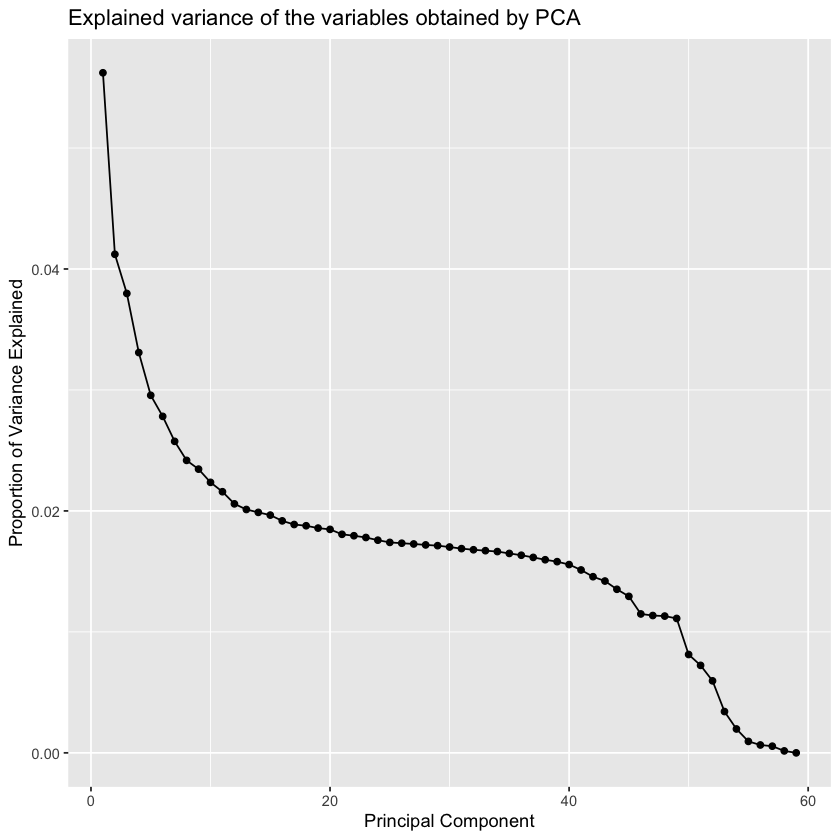

In [15]:
ggplot(variance_df, aes(x = PC, y = Variance)) +
  geom_point() +
  geom_line() +
  labs(
    title = 'Explained variance of the variables obtained by PCA',
    x = 'Principal Component',
    y = 'Proportion of Variance Explained'
  )

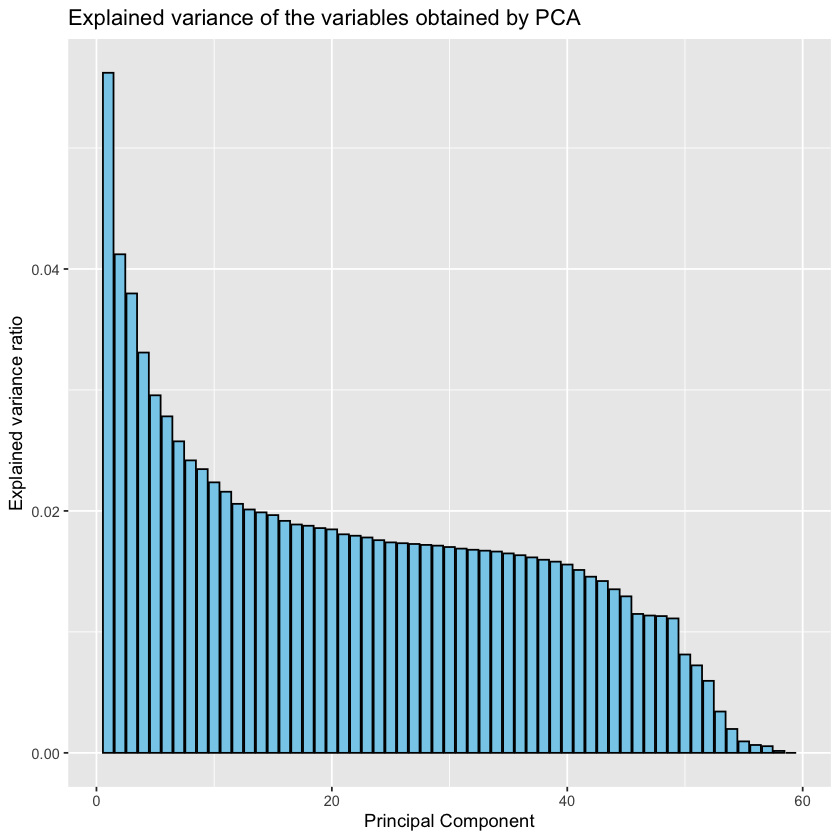

In [16]:
ggplot(variance_df, aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(
    title = 'Explained variance of the variables obtained by PCA',
    x = 'Principal Component',
    y = 'Explained variance ratio'
  )

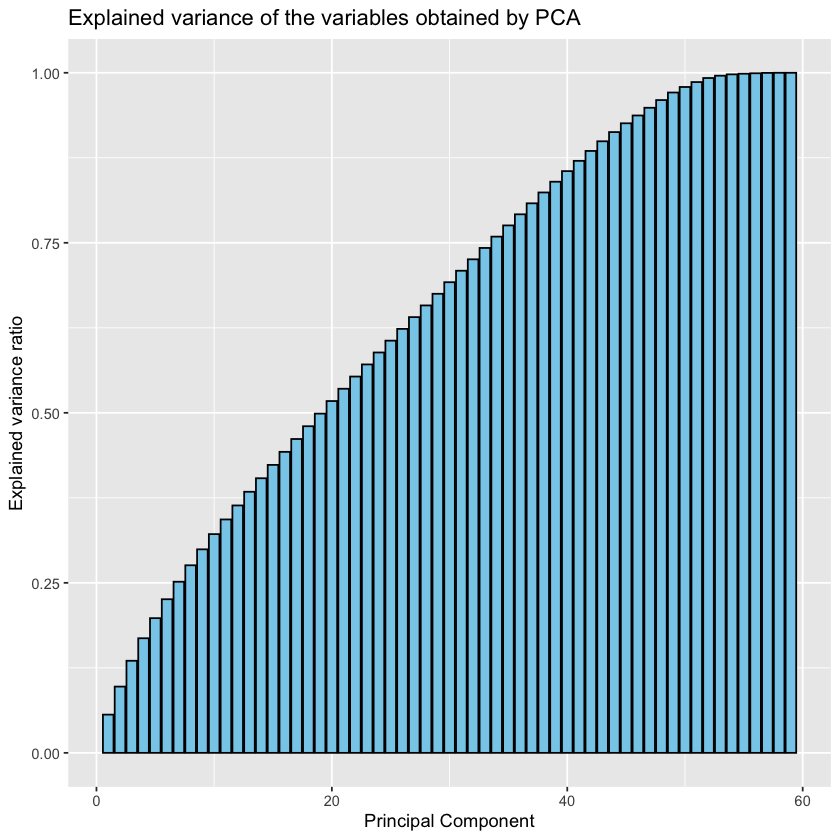

In [17]:
ggplot(cumulative_variance_df, aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(
    title = 'Explained variance of the variables obtained by PCA',
    x = 'Principal Component',
    y = 'Explained variance ratio'
  )

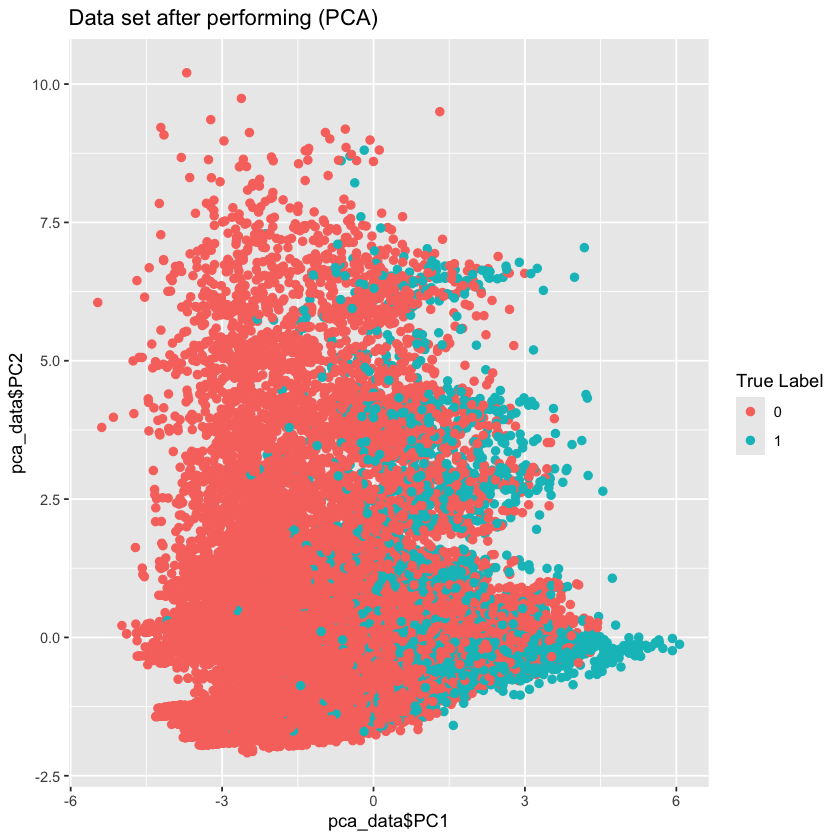

In [18]:
ggplot() +
  geom_point(
    aes(x=pca_data$PC1,
        y=pca_data$PC2,
        color=data$income_binary %>% as.factor),
    size=2)+
  labs(title='Data set after performing (PCA)', color='True Label')

In [19]:
kmeans.res <- kmeans(pca_data[, 1:15], 2, nstart=10)
kmeans.final.pca = kmeans.res$cluster

In [20]:
pam.final.pca <- pam(pca_data[,1:15], k=2)$clustering

In [ ]:
# agnes.res <- agnes(pca_data[, 1:15],  method="single")
# agnes.final.pca <- cutree(agnes.res, k=2)

In [ ]:
diana.res <- diana(pca_data[, 1:15])
diana.final.pca <- cutree(diana.res, k=2)

In [ ]:
write.csv(kmeans.res, 'kmeans.csv', row.names = TRUE)
write.csv(pam.final.pca, 'pca.csv', row.names = TRUE)
# write.csv(agnes.res, 'agnes.csv', row.names = TRUE)
write.csv(diana.res, 'diana.csv', row.names = TRUE)

In [ ]:
create_plot <- function(title, cluster_data) {
  ggplot() +
    geom_point(
      aes(x = pca.data$PC1,
          y = pca.data$PC2,
          shape = as.factor(cluster_data), 
          color = as.factor(y$label)),
      size = 1) +
    labs(title = title, shape = 'Cluster', color = 'Label')
}

In [ ]:
plot1 <- create_plot('K-Means (PCA)', kmeans.final.pca)
plot2 <- create_plot('PAM (PCA)', pam.final.pca)
# plot3 <- create_plot('AGNES (PCA)', agnes.final.pca)
plot4 <- create_plot('DIANA (PCA)', diana.final.pca)

grid.arrange(plot1, plot2, plot3, plot4, ncol = 2, nrow = 2)

## Jula

In [ ]:
numerical_columns <- names(data[sapply(data, is.numeric)])
numerical_columns <- numerical_columns[numerical_columns != "income_binary"]
factor_columns <- names(data[sapply(data, is.factor)])

In [ ]:
cluster_data <- select(data, -income_binary)

In [ ]:
dummy <- dummyVars("~ .", data = cluster_data, fullRank = TRUE)
cluster_data_onehot <- data.frame(predict(dummy, newdata = cluster_data))

In [ ]:
# methods <- c("kmeans", "pam", "agnes","diana")
methods <- c("kmeans", "pam","diana")
k_range <- 2:8

internal_val <- clValid(cluster_data_onehot, nClust=k_range, clMethods=methods, validation="internal", method = "single", 
                        maxitems=nrow(cluster_data))

In [ ]:
optimalScores(internal_val)

In [ ]:
k <- as.data.frame(internal_val@measures[,,"kmeans"])
k$method <- c('kmeans', 'kmeans', 'kmeans')

p <- as.data.frame(internal_val@measures[,,"pam"])
p$method <- c('PAM', "PAM", 'PAM')

a <- as.data.frame(internal_val@measures[,,"agnes"])
a$method <- c('AGNES', "AGNES", 'AGNES')

d <- as.data.frame(internal_val@measures[,,"diana"])
d$method <- c('DIANA', "DIANA", 'DIANA')

df <- rbind(k,p,a,d)

In [ ]:
write.csv(df, 'assesment.csv', row.names = TRUE)

In [ ]:
conn <- df[c(1, 4, 7, 10), ]
dunn <- df[c(2,5,8,11), ]
sil <- df[c(3,6,9,12), ]

In [ ]:
conn_df <- conn %>%
  rownames_to_column(var = "Conn") %>%
  pivot_longer(cols = -c(Conn, method), 
               names_to = "k", 
               values_to = "Connectivity") %>%
  mutate(k = as.integer(k))  %>%
  select(-Conn)

dunn_df <- dunn %>%
  rownames_to_column(var = "Du") %>%
  pivot_longer(cols = -c(Du, method), 
               names_to = "k", 
               values_to = "Dunn") %>%
  mutate(k = as.integer(k))  %>%
  select(-Du)

sil_df <- sil %>%
  rownames_to_column(var = "Silh") %>%
  pivot_longer(cols = -c(Silh, method), 
               names_to = "k", 
               values_to = "Silhouette") %>%
  mutate(k = as.integer(k))  %>%
  select(-Silh)

In [ ]:
n <- sum(cumulative_variance < 0.9) + 1

In [ ]:
pca.train.data = pca.data[, 1:n.pc]
write.table(pca.train.data, file = "data\\pca_data.csv",
            sep = ",", row.names = F)

In [ ]:
diana.res <- diana(pca.train.data)

In [ ]:
kmeans.silhouettes <- numeric()
agnes.silhouettes <- numeric()
pam.silhouettes <- numeric()
diana.silhouettes <- numeric()

In [ ]:
compute_silhouette <- function(cluster_labels, distance_matrix) {
  silhouette_res <- silhouette(cluster_labels, distance_matrix)
  mean(silhouette_res[, 3])
}

In [ ]:
for (k in 2:10) {
  # K-means clustering
  kmeans_res <- kmeans(pca.train.data, k, nstart = 10)
  kmeans_silhouette <- compute_silhouette(kmeans_res$cluster, dist(pca.train.data))
  kmeans.silhouettes <- c(kmeans.silhouettes, kmeans_silhouette)
  
  # AGNES clustering
  agnes_res <- agnes(pca.train.data, method = "complete")
  agnes_partition <- cutree(agnes_res, k = k)
  agnes_silhouette <- compute_silhouette(agnes_partition, dist(pca.train.data))
  agnes.silhouettes <- c(agnes.silhouettes, agnes_silhouette)
  
  # PAM clustering
  pam_res <- pam(pca.train.data, k = k)
  pam_silhouette <- compute_silhouette(pam_res$clustering, dist(pca.train.data))
  pam.silhouettes <- c(pam.silhouettes, pam_silhouette)
  
  # DIANA clustering
  diana_partition <- cutree(diana.res, k = k)
  diana_silhouette <- compute_silhouette(diana_partition, dmatrix = data_dissimilarity_matrix)
  diana.silhouettes <- c(diana.silhouettes, diana_silhouette)
}